In [2]:
import matplotlib.pyplot as plt
import numpy as np
import polars as pl
import seaborn as sns
from tqdm import tqdm

from compstat_research.config import MPLSTYLE_DIR, PROCESSED_DATA_DIR

plt.style.use(MPLSTYLE_DIR / "iragca_ml.mplstyle")

2025-02-20 11:45:32.431 | INFO     | compstat_research.config:<module>:11 - PROJ_ROOT path is: D:\Documents\3 Production Save Files\1 Cloned repositories\compstat-research


In [3]:
data_dir = PROCESSED_DATA_DIR / "cds" / "era5" / "2m-temperature" / "global"

daily_temp = pl.read_parquet(data_dir / "era5-2m-temperature-global-daily-avg.parquet")
yearly_temp = pl.read_parquet(data_dir / "era5-2m-temperature-global-yearly-avg.parquet")
daily_temp.head()

temp_year,temp_month,temp_day,avg_temp
i64,i64,i64,f64
1940,1,2,276.007051
1940,1,3,275.975732
1940,1,4,275.934177
1940,1,5,275.893011
1940,1,6,275.7141


## Looking at seasonal data

Text(0.5, 1.0, '1940-2025')

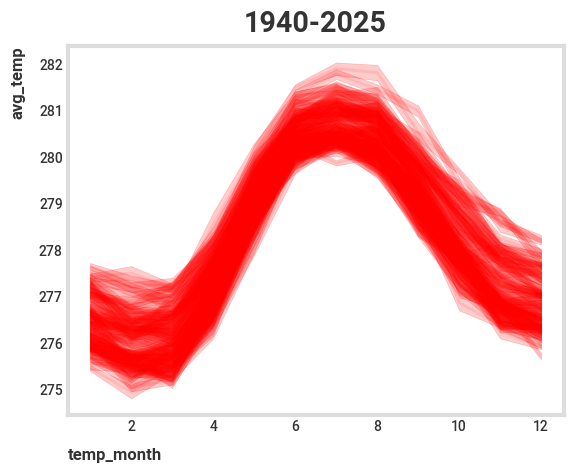

In [ ]:
START_YEAR = 1940
END_YEAR = START_YEAR + 85
for year in range(START_YEAR, END_YEAR):
    sns.lineplot(
        data=daily_temp.filter(pl.col("temp_year") == year), 
        x='temp_month', 
        y='avg_temp',
        alpha=0.1,
        color='red',
        label="_nolegend_"
    )
plt.title(f"{START_YEAR} - {END_YEAR}")

Text(0.5, 1.0, '1980 - 2025')

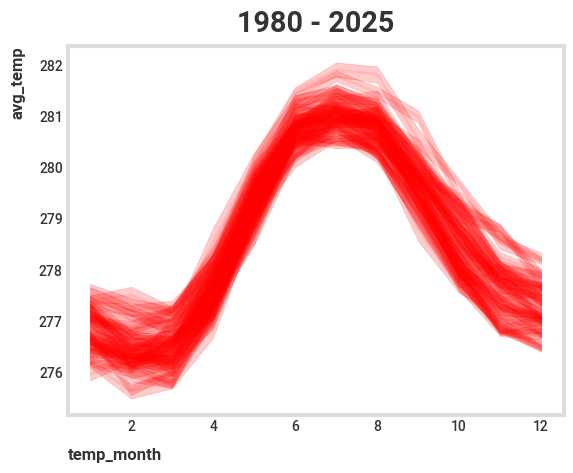

In [14]:
START_YEAR = 1980
END_YEAR = START_YEAR + 45
for year in range(START_YEAR, END_YEAR):
    sns.lineplot(
        data=daily_temp.filter(pl.col("temp_year") == year), 
        x='temp_month', 
        y='avg_temp',
        alpha=0.1,
        color='red',
        label="_nolegend_"
    )
plt.title(f"{START_YEAR} - {END_YEAR}")

Text(0.5, 1.0, '1940 - 1985')

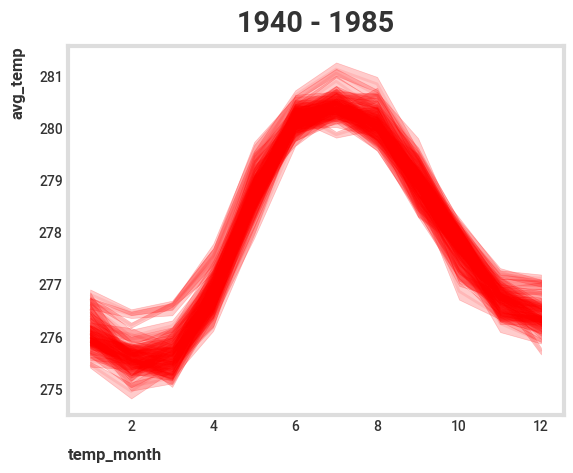

In [19]:
START_YEAR = 1940
END_YEAR = START_YEAR + 45
for year in range(START_YEAR, END_YEAR):
    sns.lineplot(
        data=daily_temp.filter(pl.col("temp_year") == year), 
        x='temp_month', 
        y='avg_temp',
        alpha=0.1,
        color='red',
        label="_nolegend_"
    )
plt.title(f"{START_YEAR} - {END_YEAR}")

## Simulate the yearly averages by using the distribution of each year.

In [73]:
sims = np.zeros((1000, 85))
for iteration in tqdm(sims, unit="iteration"):
    for year in range(85):
        iteration[year] = np.random.choice(daily_temp.filter(pl.col("temp_year") == year + 1940)["avg_temp"], size=365).mean()

100%|██████████| 10000/10000 [03:25<00:00, 48.76iteration/s]


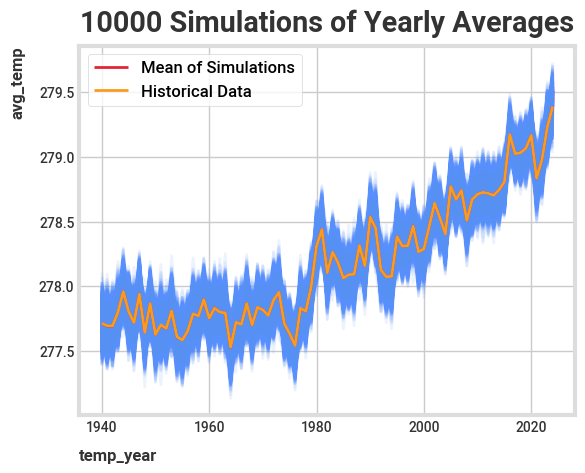

In [75]:
for sim in tqdm(sims, unit='plot'):
    sns.lineplot(x=np.arange(1940, 1940 + 85), y=sim, alpha=0.1, color='#5790fc', label="_nolegend_")

# plot the mean of the simulations
sns.lineplot(x=np.arange(1940, 1940 + 85), y=sims.mean(axis=0), color='#e42536', label="Mean of Simulations")

# plot the historical data
sns.lineplot(data=daily_temp, x='temp_year', y='avg_temp', color='#f89c20', label="Historical Data")

plt.title("1000 Simulations of Yearly Averages")
plt.grid()
plt.legend()
plt.show()

## Simulate by using the current and previous distributions

In [84]:
sims = np.zeros((1000, 85))
for iteration in tqdm(sims, unit="iteration"):
    for year in range(85):
        iteration[year] = np.random.choice(daily_temp.filter(pl.col("temp_year") <= year + 1941)["avg_temp"], size=365).mean()

100%|██████████| 1000/1000 [00:19<00:00, 50.55iteration/s]


  0%|          | 0/1000 [00:00<?, ?plot/s]

100%|██████████| 1000/1000 [00:19<00:00, 51.59plot/s]


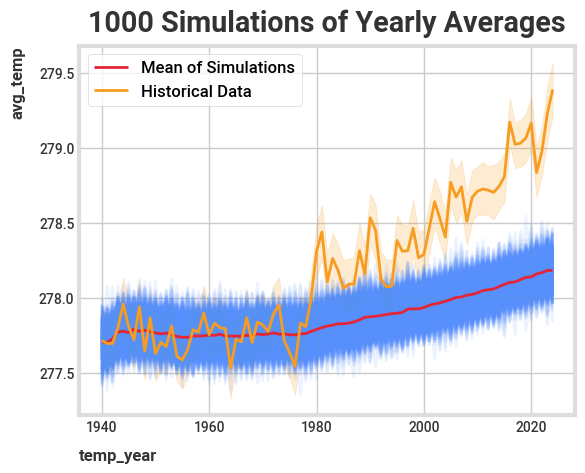

In [85]:
for sim in tqdm(sims, unit='plot'):
    sns.lineplot(x=np.arange(1940, 1940 + 85), y=sim, alpha=0.1, color='#5790fc', label="_nolegend_")

# plot the mean of the simulations
sns.lineplot(x=np.arange(1940, 1940 + 85), y=sims.mean(axis=0), color='#e42536', label="Mean of Simulations")

# plot the historical data
sns.lineplot(data=daily_temp, x='temp_year', y='avg_temp', color='#f89c20', label="Historical Data")

plt.title("1000 Simulations of Yearly Averages")
plt.grid()
plt.legend()
plt.show()

## Simulate using current years distribution and last 5 years

In [86]:
sims = np.zeros((1000, 85))
for iteration in tqdm(sims, unit="iteration"):
    for year in range(85):
        iteration[year] = np.random.choice(
            daily_temp.filter(
                (year + 1941 - 5 <= pl.col("temp_year")) & (pl.col("temp_year") <= year + 1941)
            )["avg_temp"],
            size=365,
        ).mean()

100%|██████████| 1000/1000 [00:22<00:00, 44.20iteration/s]


100%|██████████| 1000/1000 [00:18<00:00, 55.50plot/s]


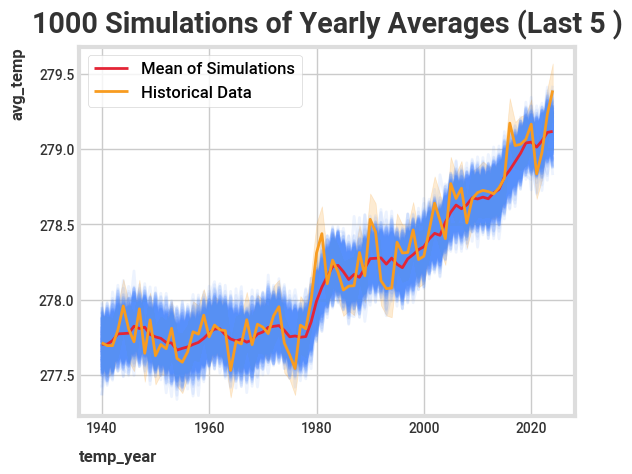

In [87]:
for sim in tqdm(sims, unit='plot'):
    sns.lineplot(x=np.arange(1940, 1940 + 85), y=sim, alpha=0.1, color='#5790fc', label="_nolegend_")

# plot the mean of the simulations
sns.lineplot(x=np.arange(1940, 1940 + 85), y=sims.mean(axis=0), color='#e42536', label="Mean of Simulations")

# plot the historical data
sns.lineplot(data=daily_temp, x='temp_year', y='avg_temp', color='#f89c20', label="Historical Data")

plt.title("1000 Simulations of Yearly Averages (Last 5 years)")
plt.grid()
plt.legend()
plt.show()

## Simulate using only the previous 5 years

In [97]:
START_YEAR = 1945
sims = np.zeros((1000, 85))
for iteration in tqdm(sims, unit="iteration"):
    for year in range(85):
        iteration[year] = np.random.choice(
            daily_temp.filter(
                (START_YEAR - 5 + year <= pl.col("temp_year")) & (pl.col("temp_year") <= START_YEAR + year - 1)
            )["avg_temp"],
            size=365,
        ).mean()

100%|██████████| 1000/1000 [00:21<00:00, 47.11iteration/s]


In [98]:
for sim in tqdm(sims, unit='plot'):
    sns.lineplot(x=np.arange(START_YEAR, 1940 + 85), y=sim, alpha=0.1, color='#5790fc', label="_nolegend_")

# plot the mean of the simulations
sns.lineplot(x=np.arange(1940, 1940 + 85), y=sims.mean(axis=0), color='#e42536', label="Mean of Simulations")

# plot the historical data
sns.lineplot(data=daily_temp, x='temp_year', y='avg_temp', color='#f89c20', label="Historical Data")

plt.title("1000 Simulations of Yearly Averages (Last 5 years)")
plt.grid()
plt.legend()
plt.show()

  0%|          | 0/1000 [00:00<?, ?plot/s]


ValueError: All arrays must be of the same length